Diabetes **Predictor**


## Project Statement

Diabetes is a chronic disease that affects millions worldwide. Early prediction can help in timely intervention and treatment.  
The goal of this project is to build a **machine learning model** to predict whether a person has diabetes based on medical parameters like BP, Cholestrol, General Health BMI, age, etc.

---

### Objective:
- Identify the most important features contributing to predictions.
- Train and evaluate different ML models to predict diabetes.
- Evaluate the performance and visualising them

### Dataset Contains:
- **Source:** Diabetes Health Indicators Dataset **(BRFSS 2015)**

- **Features:** BP, Cholestrol, Cholestrol check, BMI, Smoking Status,Stroke, HeartDiseaseorAttack, Physical Activity, Fruits, Veggies,Heavy Alcohol Consumption, Any Healthcare, NoDocbcCost, General Health,Mental Health, Physical Health, Different Walk, Sex, Age , Education, Income

- **Target Variable:** **Outcome** (0 = No Diabetes, **1** = Diabetes)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/diabetes-health.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#checking the outcomes
data['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


In [ ]:
#checking if there is empty values in dataset
data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [4]:
data['Diabetes_012'] = data['Diabetes_012'].map({0:0,1:1,2:1})

In [5]:
data['Diabetes_012'].value_counts()

,count
Diabetes_012,
0,213703
1,39977


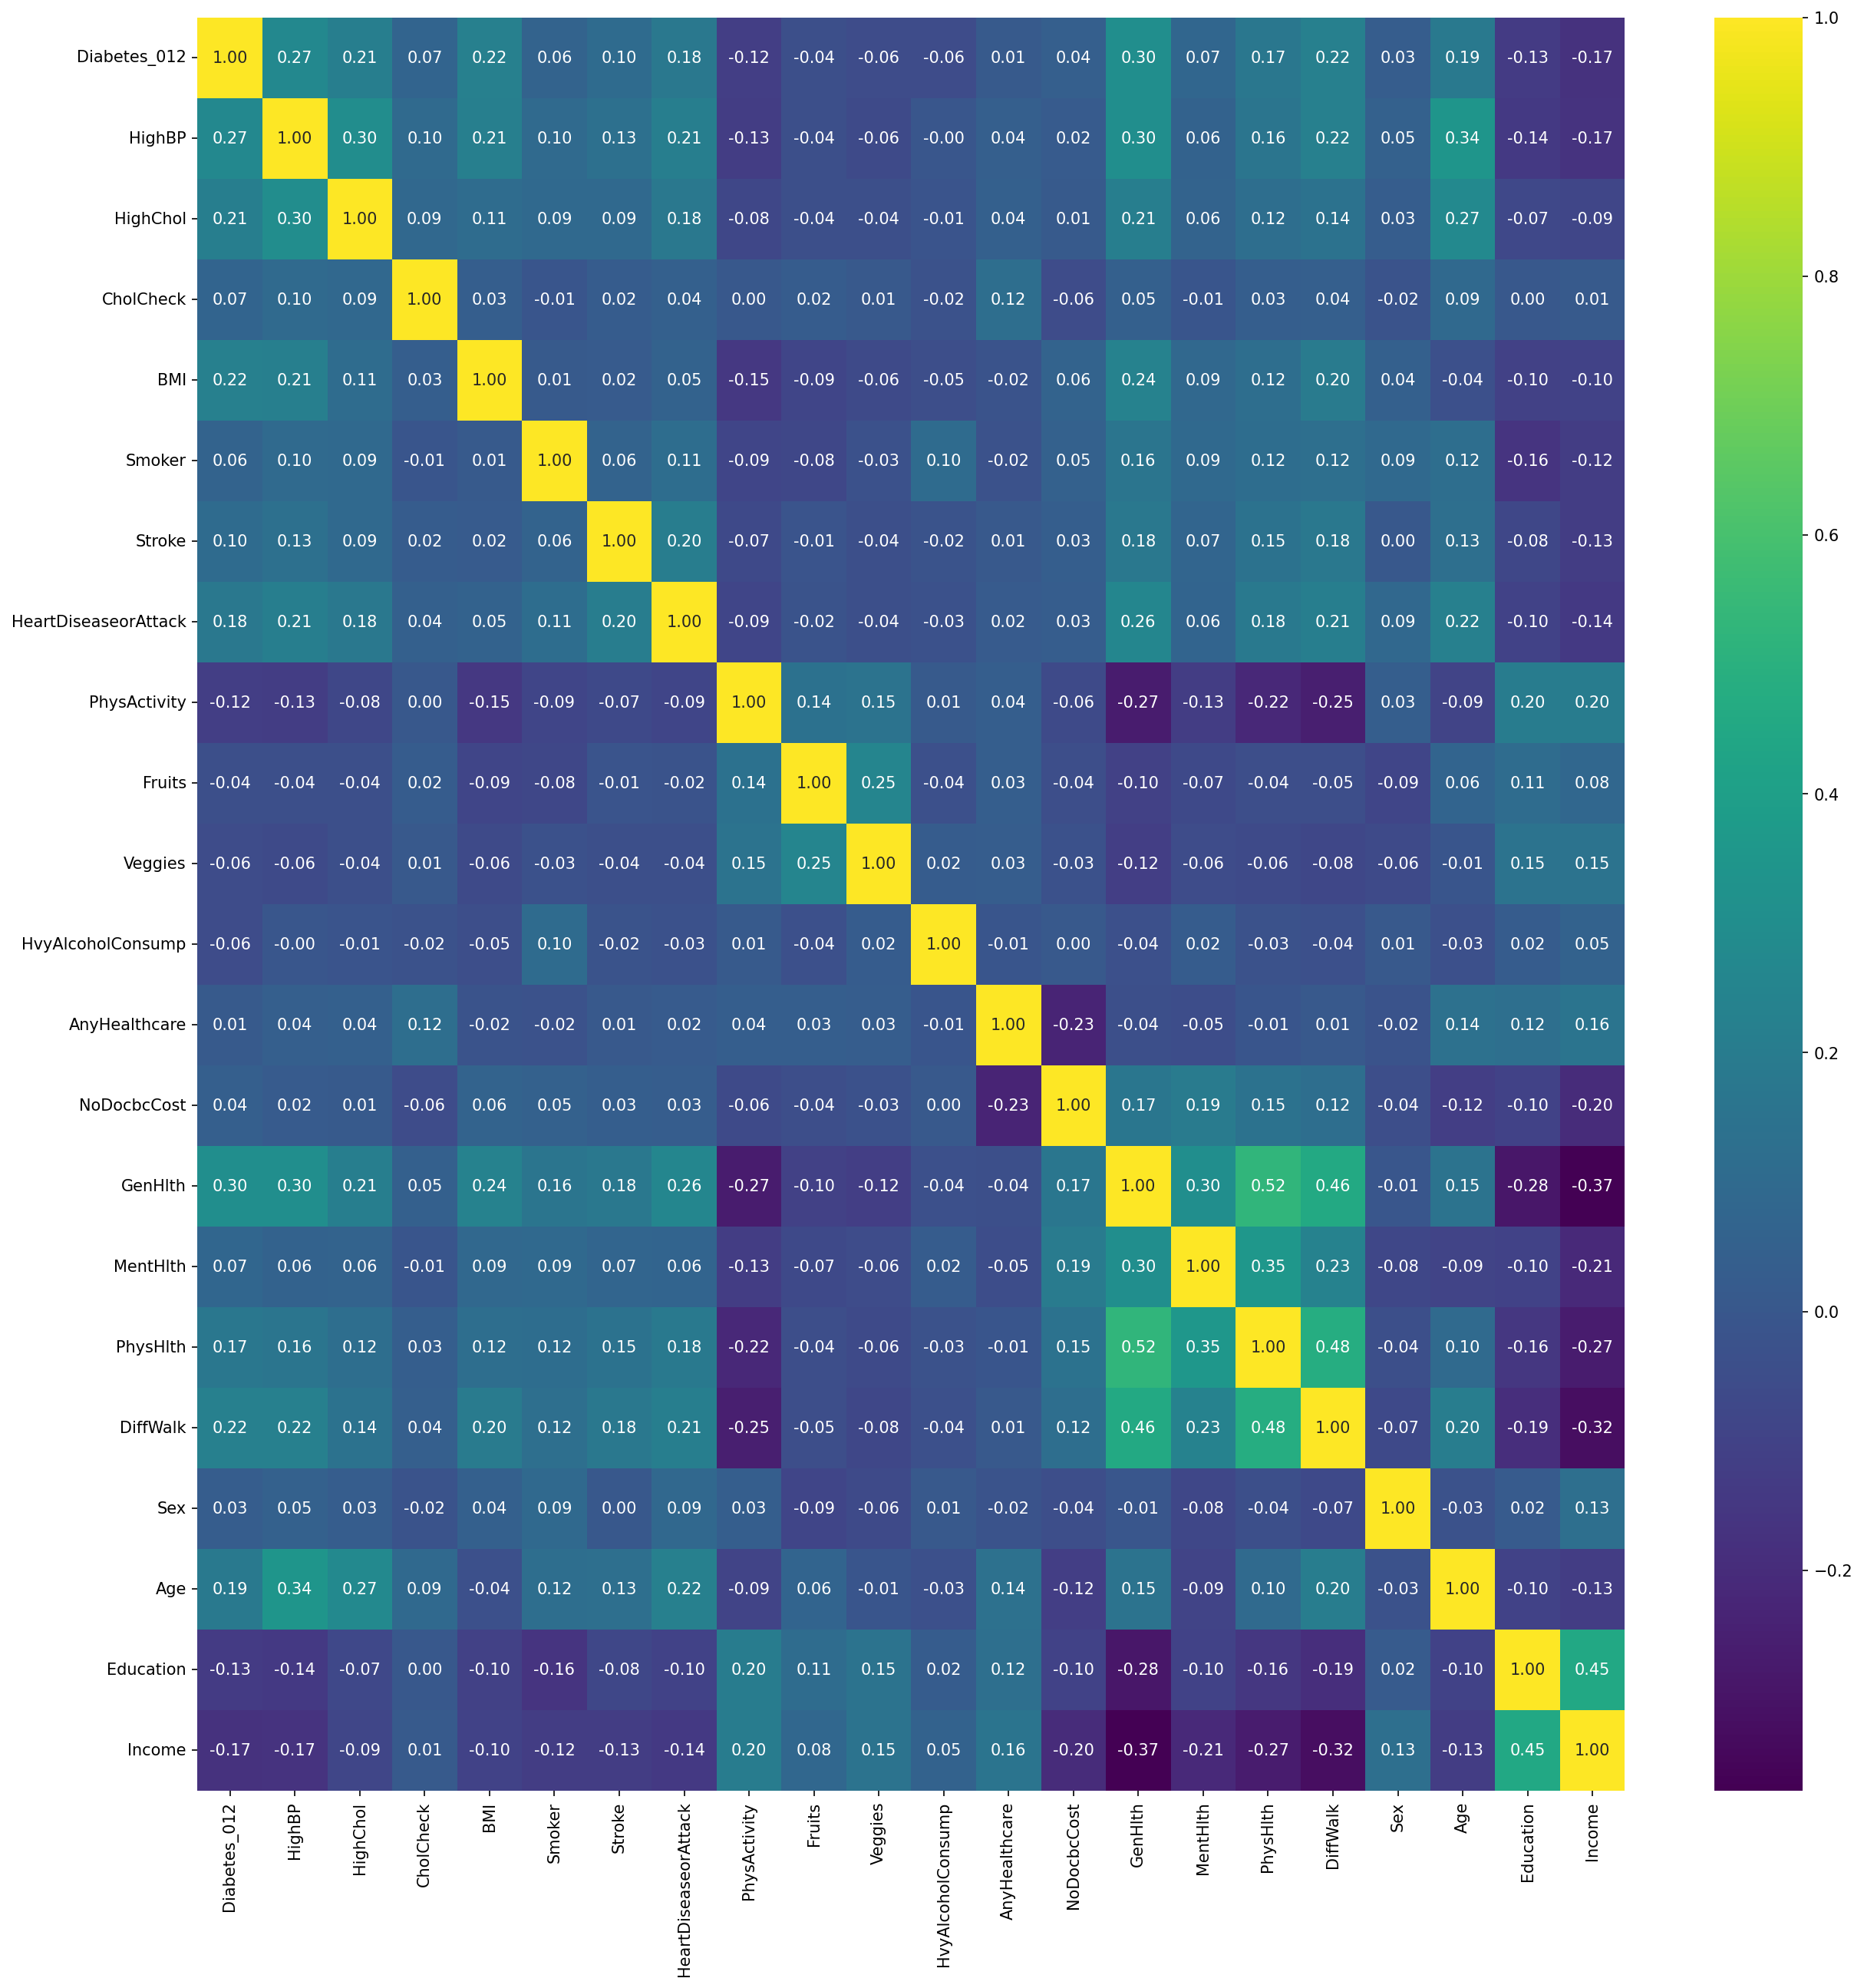

In [ ]:
plt.figure(figsize = (20,20),dpi = 150)
sns.heatmap(data.corr(),annot = True,cmap = 'viridis',fmt = '.2f',)

plt.show()

In [6]:
matrix_corr = data.corr()['Diabetes_012'].abs()
low_correlation = matrix_corr[matrix_corr < 0.05]

print(low_correlation)

Fruits           0.042088
AnyHealthcare    0.014079
NoDocbcCost      0.038025
Sex              0.029606
Name: Diabetes_012, dtype: float64


These features do not have much correlation to outcomes:
*   Eating Fruits
*   Having Healthcare
*   Your sex
*   Not seeing doctor because of cost



In [7]:
#dropping low correlation feature
data.drop(columns = low_correlation.index,inplace = True)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0


In [8]:
#remove highly correlated features
correlation_all = data.drop('Diabetes_012',axis = 1).corr().abs()
#only taking upper triangle so not including duplicates
upper_tri = correlation_all.where(~np.tril(np.ones(correlation_all.shape, dtype=bool)))


In [9]:
to_drop_features = [column for column in upper_tri.columns if any(upper_tri[column]>0.8)]
to_drop_features

[]

In [10]:
data.drop(columns = to_drop_features,inplace = True)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0


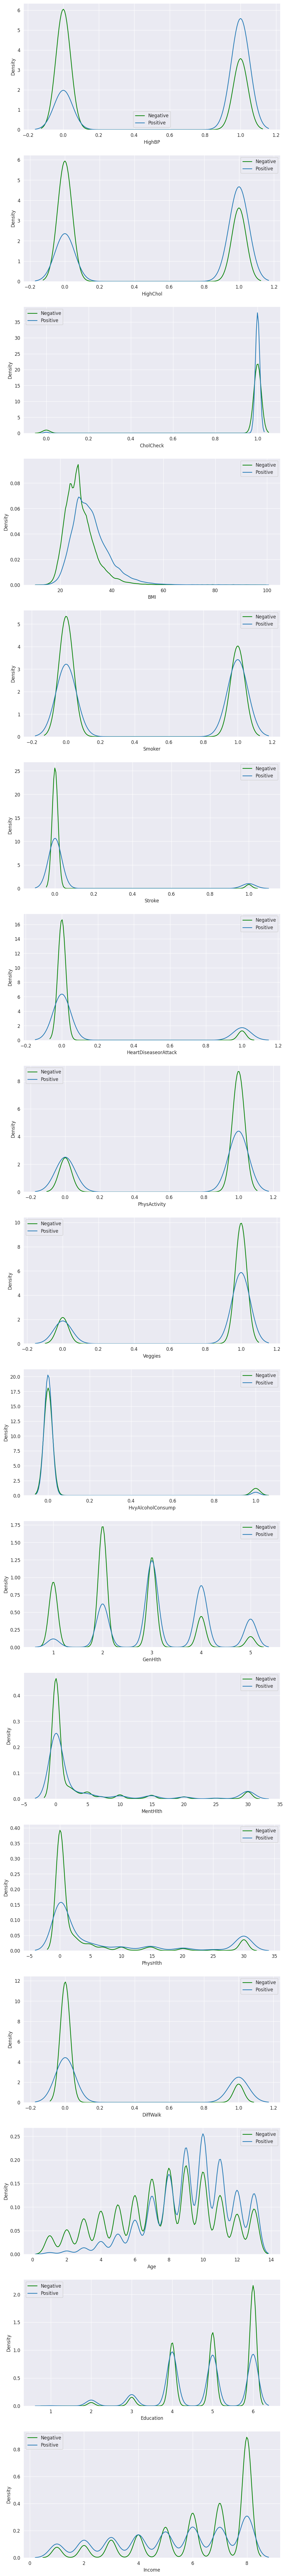

In [ ]:
sns.set_style('darkgrid')
cols = data.columns[1:]
fig,axes = plt.subplots(nrows = len(cols),ncols = 1,dpi = 120,figsize = (10,100))


for i in range(len(cols)):
    sns.kdeplot(data.query('Diabetes_012 == 0')[cols[i]],color = 'green',label = 'Negative',ax = axes[i])
    sns.kdeplot(data.query('Diabetes_012 == 1')[cols[i]],label = 'Positive',ax = axes[i])

    axes[i].legend()

plt.show()

In [11]:
x = data.drop('Diabetes_012',axis = 1)
y = data['Diabetes_012']

x.shape,y.shape

((253680, 17), (253680,))

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 21)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [15]:
#trying logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train,y_train)

y_lr = lr.predict(X_test)

In [16]:
#metric to evaluate performance
from sklearn.metrics import accuracy_score

print(accuracy_score(y_lr,y_test))

0.8465783664459161


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [i for i in range(1,11)]
}

dtc = DecisionTreeClassifier()

grid = GridSearchCV(dtc,params,cv = 5)
grid.fit(X_train,y_train)

print(grid.best_params_)

{'max_depth': 5}


In [19]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train,y_train)

y_dtc = dtc.predict(X_test)

print(accuracy_score(y_test,y_dtc))

0.8467360454115421


In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

params_rfc = {
    'n_estimators':[100,150,200],
    'max_depth':[5,9,13]
}

grid_rfc = GridSearchCV(rfc,params_rfc,cv = 3)
grid_rfc.fit(x_train,y_train)

print(grid_rfc.best_params_)

{'max_depth': 13, 'n_estimators': 200}


In [21]:
rfc = RandomForestClassifier(max_depth = 13,n_estimators = 200,class_weight = {0:1,1:3},random_state = 50, min_samples_leaf=5,min_samples_split = 10)
rfc.fit(X_train,y_train)


print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.8309730763166193
0.8088930936613056


In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
params_xgb = {
    'n_estimators':[100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.1,0.3,1]
}

grid_xgb = GridSearchCV(xgb_model,params_xgb,cv = 3,scoring = 'accuracy')
grid_xgb.fit(X_train,y_train)


print(grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [24]:
#using xgboost
xgb = XGBClassifier(learning_rate =  0.3, max_depth = 3, n_estimators = 200)
xgb.fit(X_train,y_train)

y_xgb = xgb.predict(X_test)

print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

0.8536443550930306
0.8410990223904131


In [25]:
#creating synthetic data as one class is in overwhelmingly more number
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.75, random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_oversampled.value_counts()

,count
Diabetes_012,
0,171028
1,119719


In [36]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
print(accuracy_score(y_test,y_pred))

0.8491800693787449


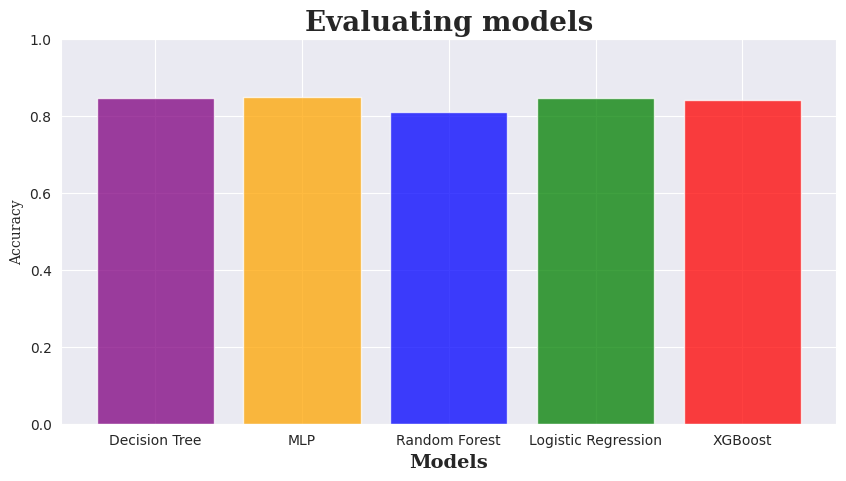

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))

models = ['Decision Tree','MLP','Random Forest','Logistic Regression','XGBoost']
score = [dtc.score(X_test,y_test),model.score(X_test,y_test),rfc.score(X_test,y_test),lr.score(X_test,y_test),xgb.score(X_test,y_test)]

colors = ['purple','orange','blue','green','red']

plt.bar(models,score,color = colors,alpha = 0.75)
plt.title('Evaluating models',fontweight = 'bold',fontsize = 20,family = 'serif')
plt.xlabel('Models',fontweight = 'bold',fontsize = 14,family = 'serif')
plt.ylabel('Accuracy',family = 'serif')

plt.ylim(0,1)
plt.show()

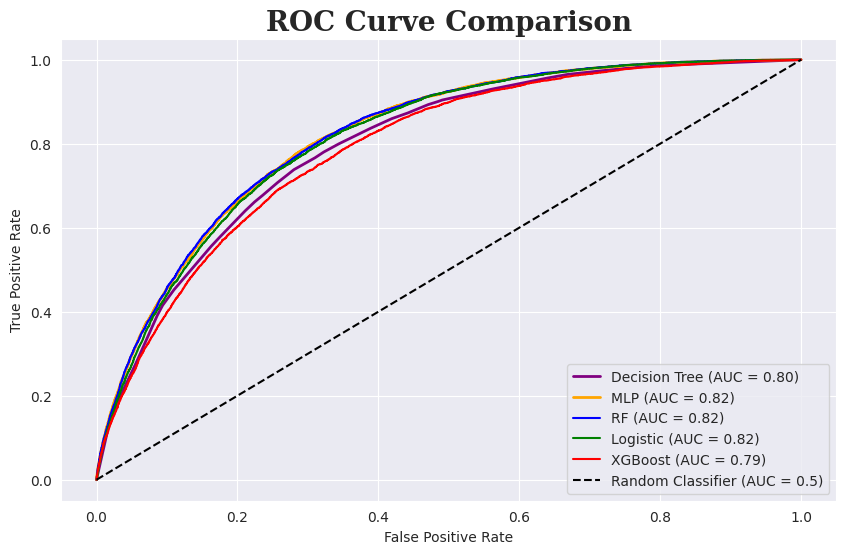

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_mlp , tpr_mlp, _ = roc_curve(y_test,model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
fpr_dtc,tpr_dtc,_ = roc_curve(y_test,dtc.predict_proba(X_test)[:,1])

# Calculating AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_mlp = auc(fpr_mlp,tpr_mlp)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

# Ploting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dtc,tpr_dtc,color = 'purple',lw = 2,label = f'Decision Tree (AUC = {roc_auc_dtc:.2f})')
plt.plot(fpr_mlp,tpr_mlp,color = 'orange',lw = 2,label = f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'RF (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Formatting

plt.plot([0, 1], [0, 1], color='black', linestyle='--',label = 'Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison',fontweight = 'bold',fontsize = 20,family = 'serif')
plt.legend(loc='lower right')
plt.show()


Almost all classification Models employed perform closely to one another, varying from simple Decision Tree to boosting ensemble XGBoost algorithm to Neural Network MLP classifier.
Peroformace could be improved further by getting more relevant features.

Random Forest Classifier with all the appropriate parameters that we found and set has proven to be working better than others. While complex algorithm like MLP has best accuracy score but still close to Random Forest.